#Problem Statement

#In this project i will aim to create a model that will predict student exam scores based on various performance factors such as hours studied,motivation, attendance, parental involvement, and motivational level. The goal is to build a predictive model that helps identify the key factors influencing academic performance, allowing educators to implement interventions to improve student outcomes. There will also be additions graphs and observatiosn like the correlation and relationship between hours studied and turoting session and motivation.

In [13]:
#import necessary libraries
import pandas as pd

# Load the dataset
file_path = r'C:\Users\\Admin\\Desktop\\OPIT\\TERM 4\\StudentPerformanceFactors.csv'
original_dataset = pd.read_csv(file_path)

#Display the first few rows to inspect the data set
original_dataset.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# Data Preprocessing 
We will start by cleaning the data. We will handle missing values, remove duplicagtes and encode categorial features. The goal is to prepare the data for modelling.

In [23]:
# Check for missing values
missing_values = original_dataset.isnull().sum()

# Check for duplicates
duplicates = original_dataset.duplicated().sum()

# Print the results
print(f"Missing values per column:\n{missing_values}")
print(f"Number of duplicate rows: {duplicates}")

# Drop rows with missing values
dataset_cleaned = original_dataset.dropna()

# Remove duplicates
dataset_cleaned = dataset_cleaned.drop_duplicates()

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                       'Distance_from_Home', 'Gender']

encoder = LabelEncoder()

for column in categorical_columns:
    dataset_cleaned[column] = encoder.fit_transform(dataset_cleaned[column])

# Check the cleaned data
dataset_cleaned.head(20)

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Number of duplicate rows: 0


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


# Explotastory Data Analysis (EDA)

In this section I will explore different relationsships between the features and will use visulisations to understand.

<function matplotlib.pyplot.show(close=None, block=None)>

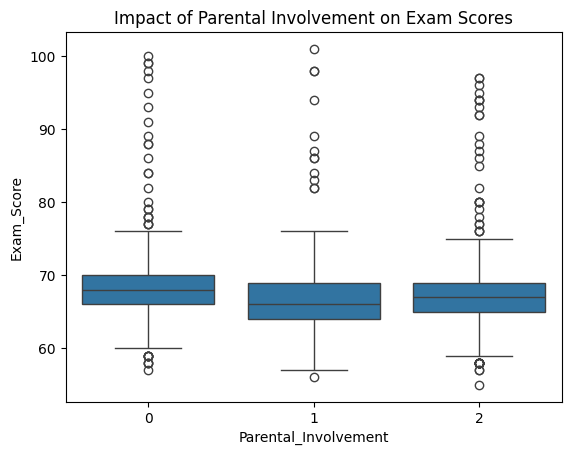

In [15]:

import matplotlib.pyplot as plt 
import seaborn as sns 

# Boxplot for Parental Involvment Vs Exam Score
sns.boxplot(x='Parental_Involvement', y='Exam_Score' , data =dataset_cleaned)
plt.title("Impact of Parental Involvement on Exam Scores")
plt.show



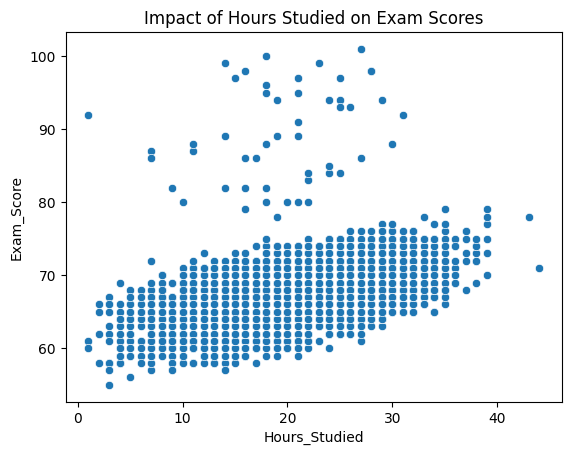

In [16]:
# Scatter plot for hours studied Vs Exam Score
sns.scatterplot(x ='Hours_Studied', y ='Exam_Score', data=dataset_cleaned)
plt.title('Impact of Hours Studied on Exam Scores')
plt.show()

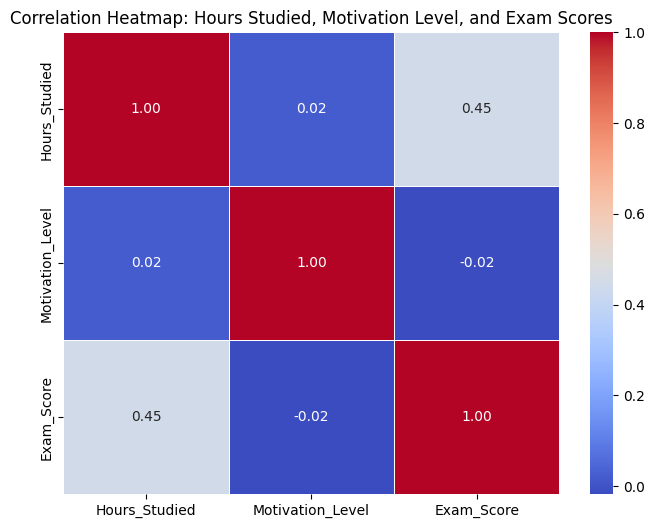

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = dataset_cleaned[['Hours_Studied', 'Motivation_Level', 'Exam_Score']].corr()

# Create a heatmap to show correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Hours Studied, Motivation Level, and Exam Scores')
plt.show()

# Evaluation of heat map

Hours Studied vs Exam Score:

Correlation = 0.45: This is a moderate positive correlation, suggesting that, generally, as the number of hours studied increases, the exam score tends to increase as well. However, the correlation is not extremely strong, so there are other factors at play.

Hours Studied vs Motivation Level:

Correlation = 0.02: This is very close to zero, indicating no meaningful linear relationship between Hours Studied and Motivation Level. So, increasing study hours doesn't seem to correlate with motivation levels in this dataset.

Motivation Level vs Exam Score:

Correlation = -0.02: This is also a very weak negative correlation, suggesting that motivation level has almost no impact on the exam score in this dataset.

Model Selection and Training

Linear Regression Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Or another model of your choice
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = dataset_cleaned.drop(columns=['Motivation_Level', 'Parental_Involvement', 'Hours_Studied'])
y = dataset_cleaned['Exam_Score']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Linear Regression in this example)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.215195379547095
R-squared: 0.6643872636734858


Random Forest Model 

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state= 33)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Squared Error: 0.006883542319749218
Random Forest R-squared: 0.999557024367177


Mdoel Comparison

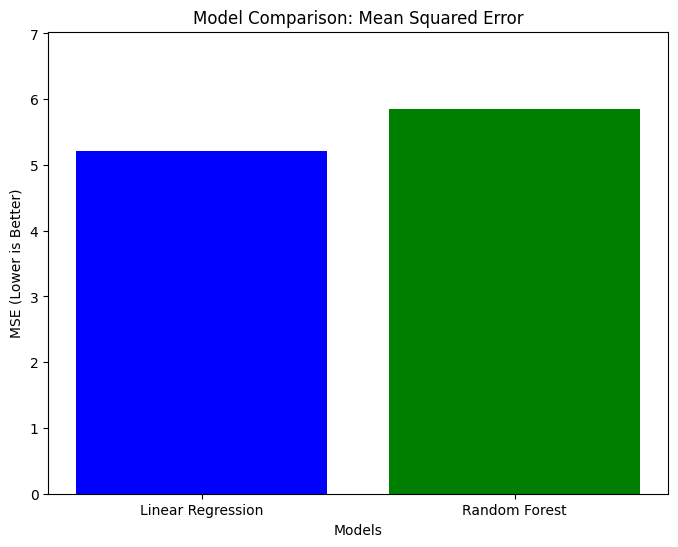

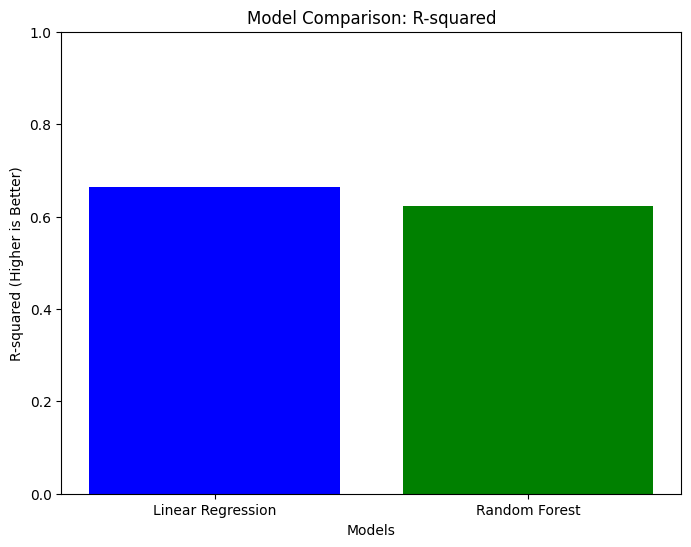

In [30]:
import matplotlib.pyplot as plt

# Define metrics for the models
models = ['Linear Regression', 'Random Forest']
mse_values = [5.215195379547095, 5.85550211598746]
r2_values = [0.6643872636734858, 0.6231816941280333]

# Plot MSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Model Comparison: Mean Squared Error')
plt.ylabel('MSE (Lower is Better)')
plt.xlabel('Models')
plt.ylim(0, max(mse_values) * 1.2)
plt.show()

# Plot R-squared Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('Model Comparison: R-squared')
plt.ylabel('R-squared (Higher is Better)')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()